In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# dataset used: https://www.kaggle.com/datasets/abhi8923shriv/sentiment-analysis-dataset

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Import data

In [3]:
df_test = pd.read_csv("/content/drive/MyDrive/Sentiment Analysis Dataset/test.csv", encoding='latin1')
df_train = pd.read_csv("/content/drive/MyDrive/Sentiment Analysis Dataset/train.csv", encoding='latin1')

## Inspect data

In [4]:
# Display the first few rows of the dataset
print(df_test.head())
print(df_train.head())

       textID                                               text sentiment  \
0  f87dea47db  Last session of the day  http://twitpic.com/67ezh   neutral   
1  96d74cb729   Shanghai is also really exciting (precisely -...  positive   
2  eee518ae67  Recession hit Veronique Branquinho, she has to...  negative   
3  01082688c6                                        happy bday!  positive   
4  33987a8ee5             http://twitpic.com/4w75p - I like it!!  positive   

  Time of Tweet Age of User      Country  Population -2020  Land Area (Km²)  \
0       morning        0-20  Afghanistan        38928346.0         652860.0   
1          noon       21-30      Albania         2877797.0          27400.0   
2         night       31-45      Algeria        43851044.0        2381740.0   
3       morning       46-60      Andorra           77265.0            470.0   
4          noon       60-70       Angola        32866272.0        1246700.0   

   Density (P/Km²)  
0             60.0  
1            1

In [5]:
# Check the column names
print(df_test.columns)
print(df_train.columns)

Index(['textID', 'text', 'sentiment', 'Time of Tweet', 'Age of User',
       'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)'],
      dtype='object')
Index(['textID', 'text', 'selected_text', 'sentiment', 'Time of Tweet',
       'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)',
       'Density (P/Km²)'],
      dtype='object')


The training dataset has an extra column named `selected_test` that contains extracted key words/phrases from the tweet to identify the sentiment category

## Sentiment Distribution

In [6]:
# Check for missing values in the 'text' column
missing_values_train = df_train['sentiment'].isnull().sum()
print("Number of missing values in 'text' column of training dataset:", missing_values_train)
missing_values_test = df_test['sentiment'].isnull().sum()
print("Number of missing values in 'text' column of testing dataset:", missing_values_test)

# Drop rows with missing values
df_test = df_test.dropna(subset=['sentiment'])
df_train = df_train.dropna(subset=['sentiment'])

# Compute distribution for sentiment values
sentiment_distribution_test = df_test['sentiment'].value_counts()
sentiment_distribution_train = df_train['sentiment'].value_counts()

print(sentiment_distribution_test)
print(sentiment_distribution_train)

Number of missing values in 'text' column of training dataset: 0
Number of missing values in 'text' column of testing dataset: 1281
sentiment
neutral     1430
positive    1103
negative    1001
Name: count, dtype: int64
sentiment
neutral     11118
positive     8582
negative     7781
Name: count, dtype: int64


Both datasets contain the most tweets with neutral sentiment, followed by positive and negative sentiments.


## Text Length Analysis

In [7]:
# Check for missing values in the 'text' column
missing_values = df_test['text'].isnull().sum()
print("Number of missing values in 'text' column:", missing_values)

# Calculate the length of each non-null tweet text (number of characters)
df_test['text_length'] = df_test['text'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)
text_length_stats = df_test['text_length'].describe()

print("below result is based on the testing dataset:")
print(text_length_stats)

Number of missing values in 'text' column: 0
below result is based on the testing dataset:
count    3534.000000
mean       67.777589
std        35.590682
min         4.000000
25%        38.000000
50%        63.000000
75%        96.750000
max       148.000000
Name: text_length, dtype: float64


<ipython-input-7-a07a194a890e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['text_length'] = df_test['text'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)


In [8]:
# Check for missing values in the 'text' column
missing_values = df_train['text'].isnull().sum()
print("Number of missing values in 'text' column:", missing_values)

# Calculate the length of each non-null tweet text (number of characters)
df_train['text_length'] = df_train['text'].apply(lambda x: len(str(x)) if pd.notnull(x) else 0)
text_length_stats = df_train['text_length'].describe()

print("below result is based on the training dataset:")
print(text_length_stats)

Number of missing values in 'text' column: 1
below result is based on the training dataset:
count    27481.000000
mean        68.352462
std         35.626155
min          0.000000
25%         39.000000
50%         64.000000
75%         97.000000
max        159.000000
Name: text_length, dtype: float64


It seems that the training dataset contains longer tweets on average.

## Time and Sentiment Correlation Analysis
whether users tend to tweet more positive or negative sentiments, during different time of the day

### Below shows analysis on the testing dataset

In [9]:
# Compute distribution for Time of Tweet column
time_distribution = df_test['Time of Tweet'].value_counts()

print(time_distribution)

Time of Tweet
morning    1178
noon       1178
night      1178
Name: count, dtype: int64


In [10]:
# Format labels on pie chart
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

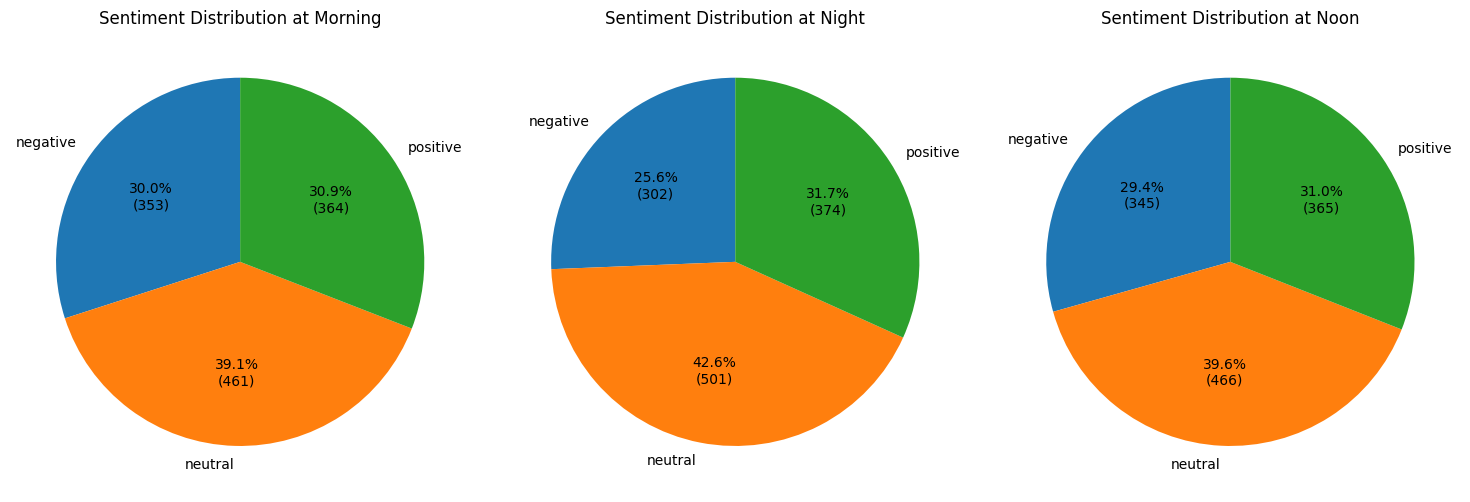

In [11]:
# Group the data by 'Time of Tweet' and 'sentiment', and count the occurrences
sentiment_counts = df_test.groupby(['Time of Tweet', 'sentiment']).size().unstack(fill_value=0)

# Plotting three pie charts side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, time_period in enumerate(sentiment_counts.index):
    ax = axes[i]
    counts = sentiment_counts.loc[time_period]
    ax.pie(counts, labels=sentiment_counts.columns, autopct=lambda pct: func(pct, counts), startangle=90)
    ax.set_title(f'Sentiment Distribution at {time_period.capitalize()}')

plt.tight_layout()
plt.show()

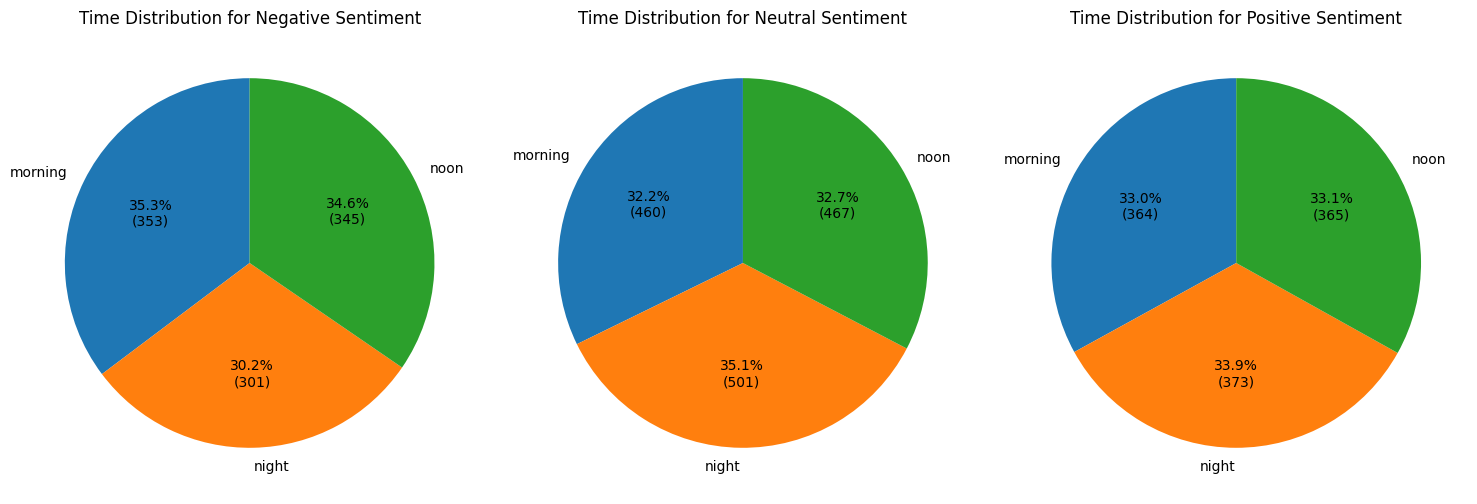

In [12]:
# Group the data by 'Time of Tweet' and 'sentiment', and count the occurrences
sentiment_counts = df_test.groupby(['sentiment', 'Time of Tweet']).size().unstack(fill_value=0)

# Plotting three pie charts side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, sentiment in enumerate(sentiment_counts.index):
    ax = axes[i]
    counts = sentiment_counts.loc[sentiment]
    ax.pie(counts, labels=sentiment_counts.columns, autopct=lambda pct: func(pct, counts), startangle=90)
    ax.set_title(f'Time Distribution for {sentiment.capitalize()} Sentiment')

plt.tight_layout()
plt.show()


### Below shows analysis on the training dataset

In [13]:
# Comput distribution for Time of Tweet column
time_distribution = df_train['Time of Tweet'].value_counts()

print(time_distribution)

Time of Tweet
morning    9161
noon       9160
night      9160
Name: count, dtype: int64


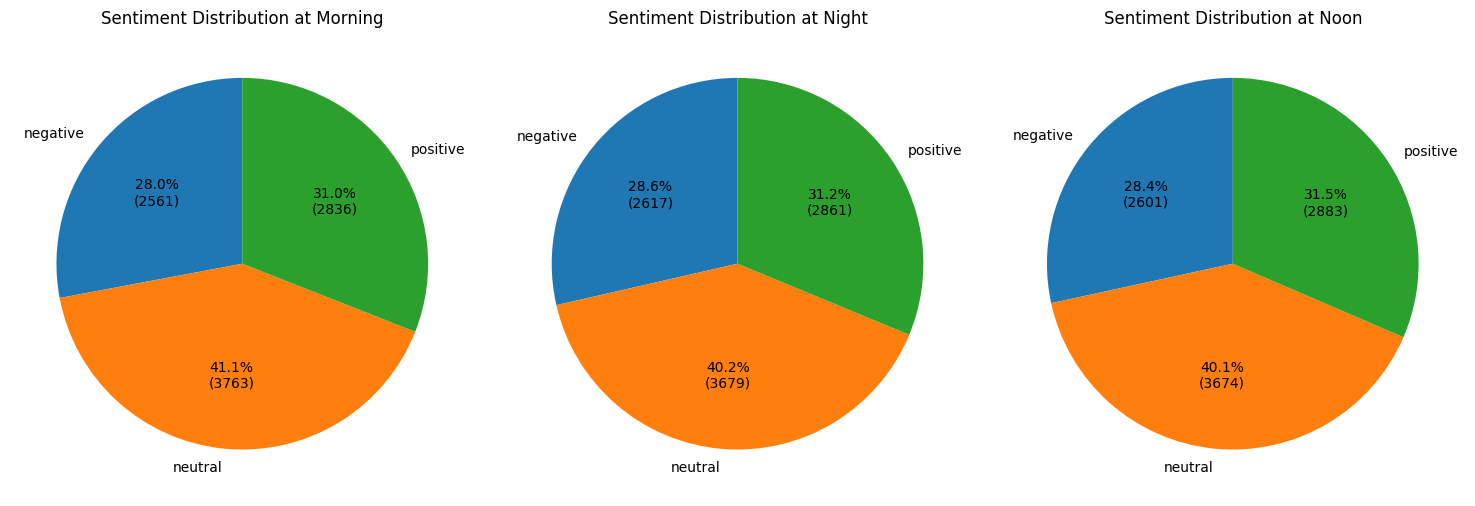

In [14]:
# Group the data by 'Time of Tweet' and 'sentiment', and count the occurrences
sentiment_counts = df_train.groupby(['Time of Tweet', 'sentiment']).size().unstack(fill_value=0)

# Plotting three pie charts side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, time_period in enumerate(sentiment_counts.index):
    ax = axes[i]
    counts = sentiment_counts.loc[time_period]
    ax.pie(counts, labels=sentiment_counts.columns, autopct=lambda pct: func(pct, counts), startangle=90)
    ax.set_title(f'Sentiment Distribution at {time_period.capitalize()}')

plt.tight_layout()
plt.show()

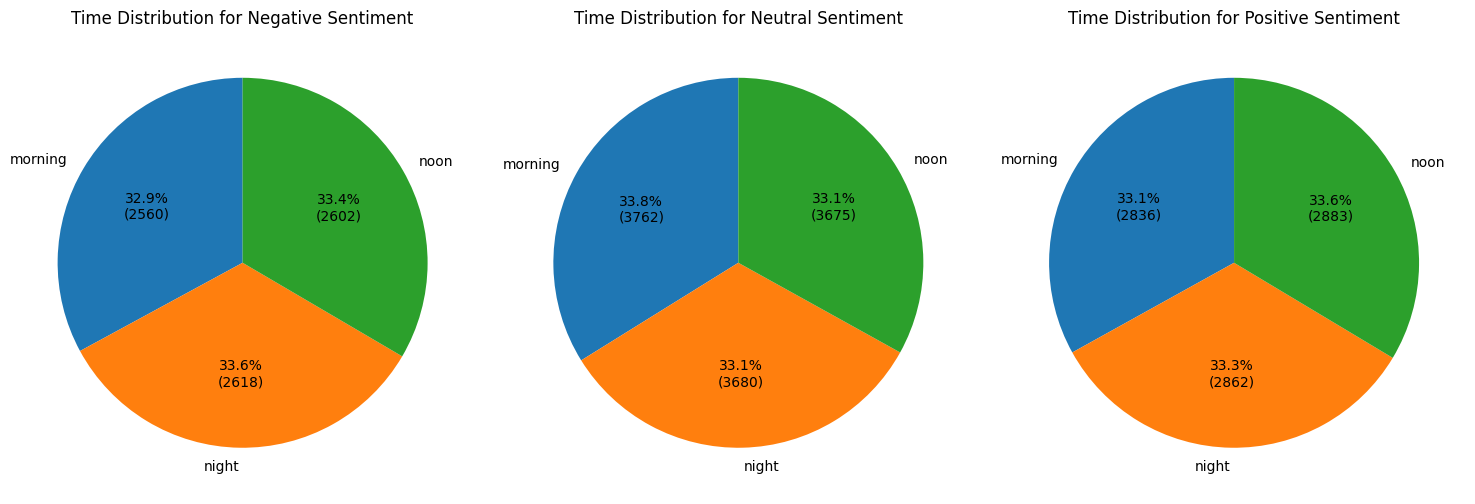

In [15]:
# Group the data by 'sentiment' and 'Time of Tweet', and count the occurrences
sentiment_counts = df_train.groupby(['sentiment', 'Time of Tweet']).size().unstack(fill_value=0)

# Plotting three pie charts side by side
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, sentiment in enumerate(sentiment_counts.index):
    ax = axes[i]
    counts = sentiment_counts.loc[sentiment]
    ax.pie(counts, labels=sentiment_counts.columns, autopct=lambda pct: func(pct, counts), startangle=90)
    ax.set_title(f'Time Distribution for {sentiment.capitalize()} Sentiment')

plt.tight_layout()
plt.show()

Compared to the testing dataset, the training dataset has a more even time distribution for each sentiment, and a more similar sentiment distribution for each time.

## Age and Sentiment Correlation Analysis
whether different age group tend to tweet more positive or negative sentiments

### Below shows analysis on the testing dataset

In [16]:
# Compute value counts for the 'Age of User' column
age_count = df_test['Age of User'].value_counts()

# Display the value counts
print(age_count)

Age of User
0-20      590
21-30     590
31-45     590
46-60     588
60-70     588
70-100    588
Name: count, dtype: int64


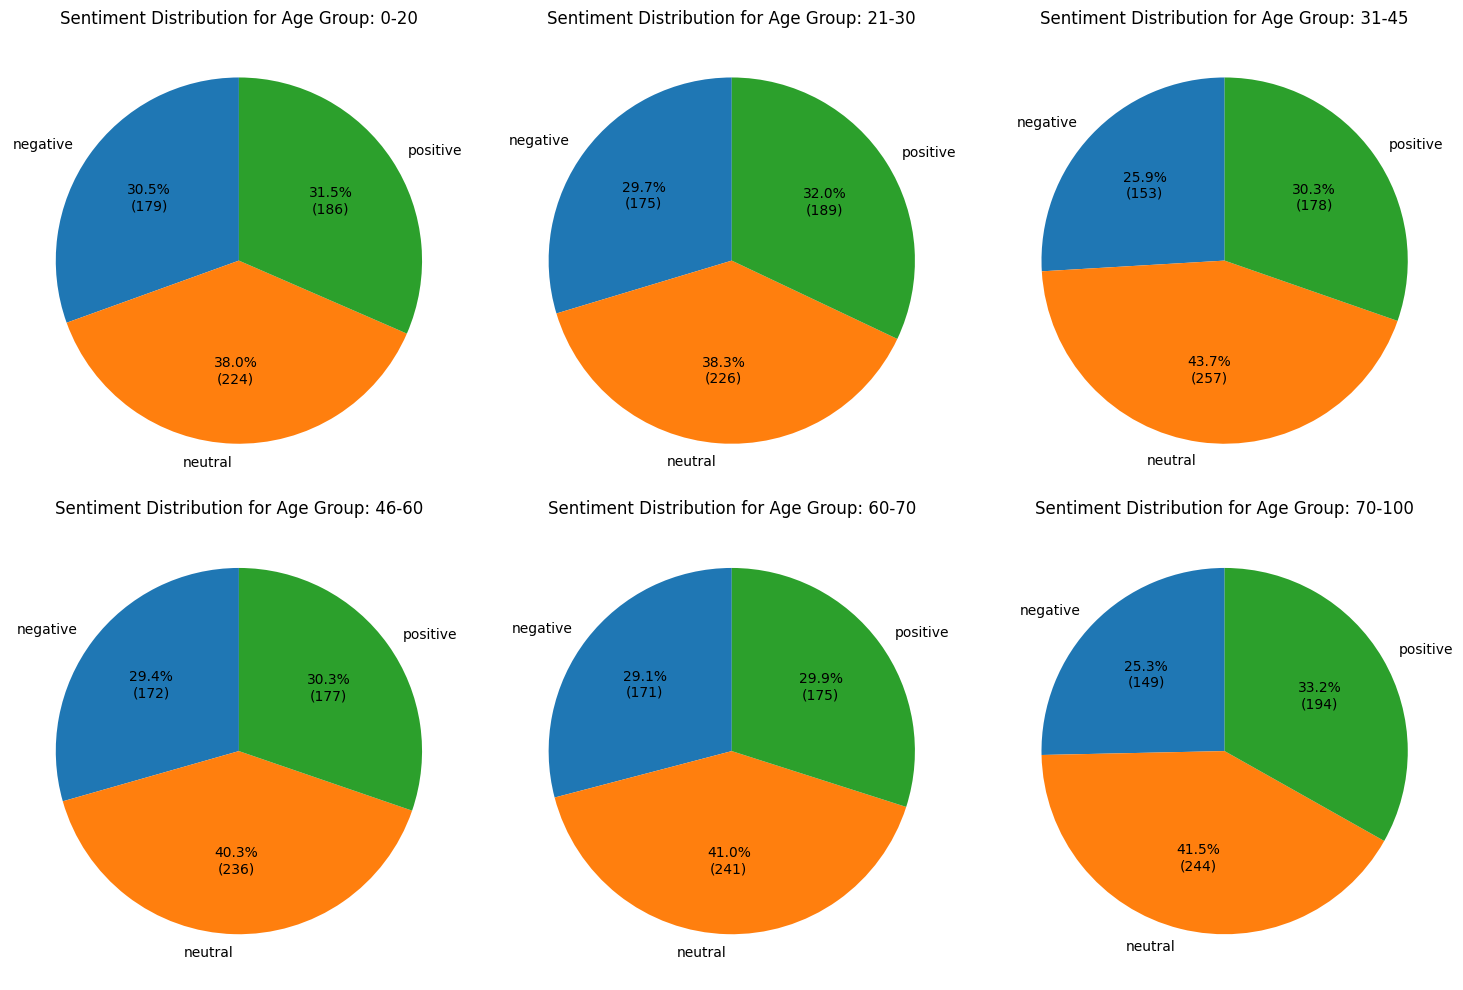

In [17]:
# Group the data by 'Age of User' and 'sentiment', and count the occurrences
age_sentiment_counts = df_test.groupby(['Age of User', 'sentiment']).size().unstack(fill_value=0)

# Plotting pie charts for sentiment distribution for each age group
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, age_group in enumerate(age_sentiment_counts.index):
    row_idx = i // 3
    col_idx = i % 3
    ax = axes[row_idx, col_idx]
    counts = age_sentiment_counts.loc[age_group]
    ax.pie(counts, labels=age_sentiment_counts.columns, autopct=lambda pct: func(pct, counts), startangle=90)
    ax.set_title(f'Sentiment Distribution for Age Group: {age_group}')

plt.tight_layout()
plt.show()

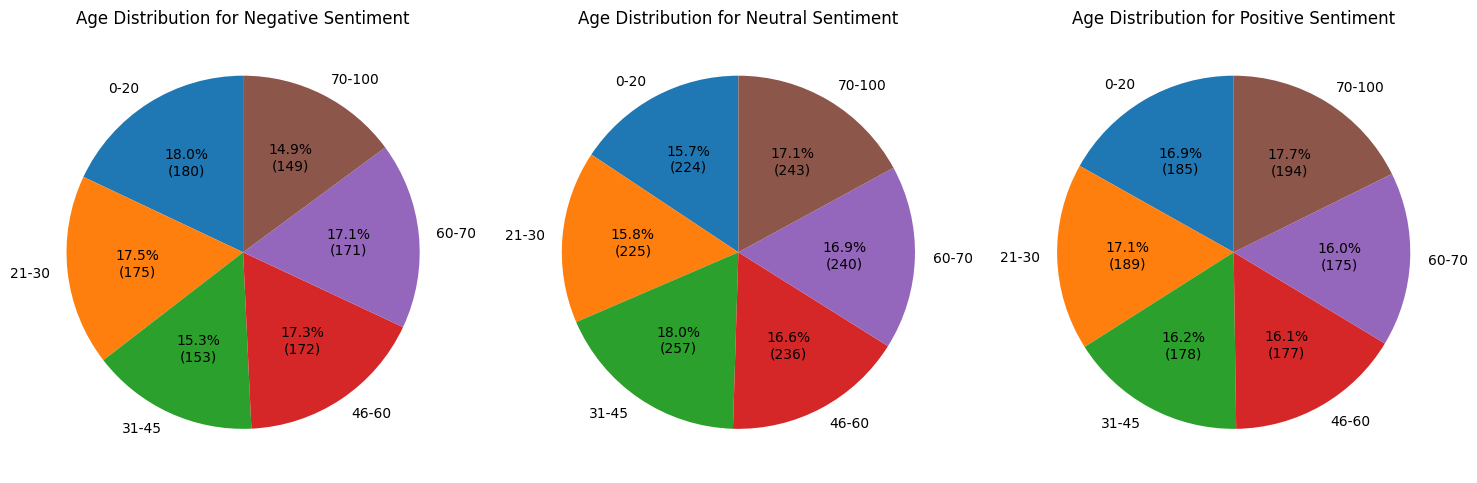

In [18]:
# Group the data by 'sentiment' and 'Age of User', and count the occurrences
sentiment_age_counts = df_test.groupby(['sentiment', 'Age of User']).size().unstack(fill_value=0)

# Plotting pie charts for age distribution for each sentiment
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, sentiment in enumerate(sentiment_age_counts.index):
    counts = sentiment_age_counts.loc[sentiment]
    ax = axes[i]
    ax.pie(counts, labels=sentiment_age_counts.columns, autopct=lambda pct: func(pct, counts), startangle=90)
    ax.set_title(f'Age Distribution for {sentiment.capitalize()} Sentiment')

plt.tight_layout()
plt.show()

### Below shows analysis on the training dataset

In [19]:
# Compute value counts for the 'Age of User' column
age_count = df_train['Age of User'].value_counts()

# Display the value counts
print(age_count)

Age of User
0-20      4581
21-30     4580
31-45     4580
46-60     4580
60-70     4580
70-100    4580
Name: count, dtype: int64


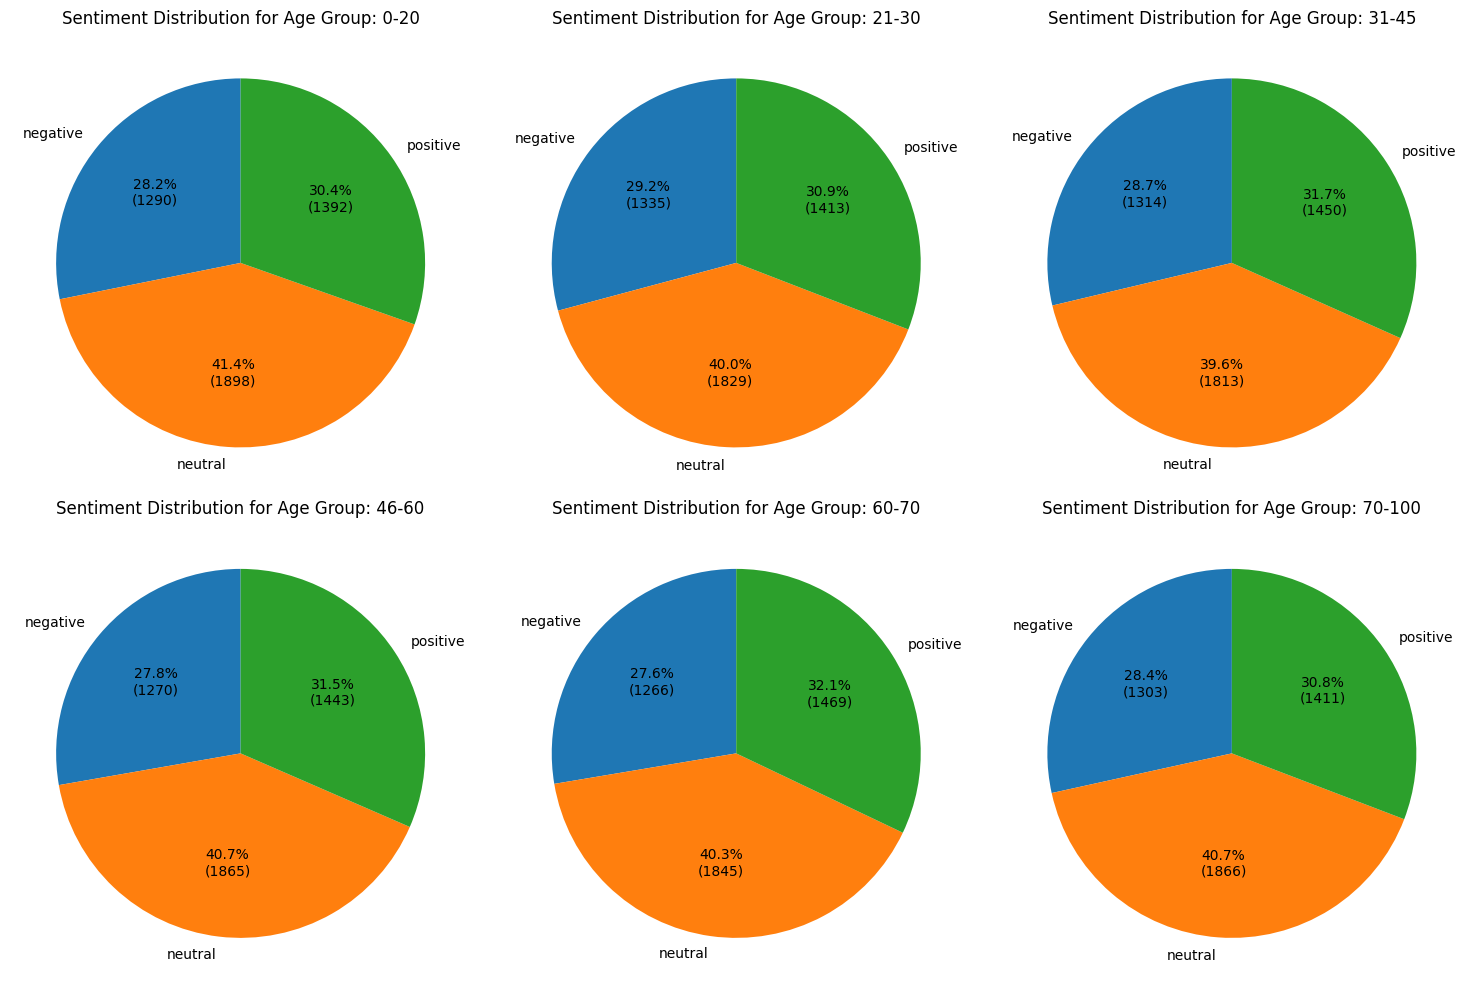

In [20]:
# Group the data by 'Age of User' and 'sentiment', and count the occurrences
age_sentiment_counts = df_train.groupby(['Age of User', 'sentiment']).size().unstack(fill_value=0)

# Plotting pie charts for sentiment distribution for each age group
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, age_group in enumerate(age_sentiment_counts.index):
    row_idx = i // 3
    col_idx = i % 3
    ax = axes[row_idx, col_idx]
    counts = age_sentiment_counts.loc[age_group]
    ax.pie(counts, labels=age_sentiment_counts.columns, autopct=lambda pct: func(pct, counts), startangle=90)
    ax.set_title(f'Sentiment Distribution for Age Group: {age_group}')

plt.tight_layout()
plt.show()

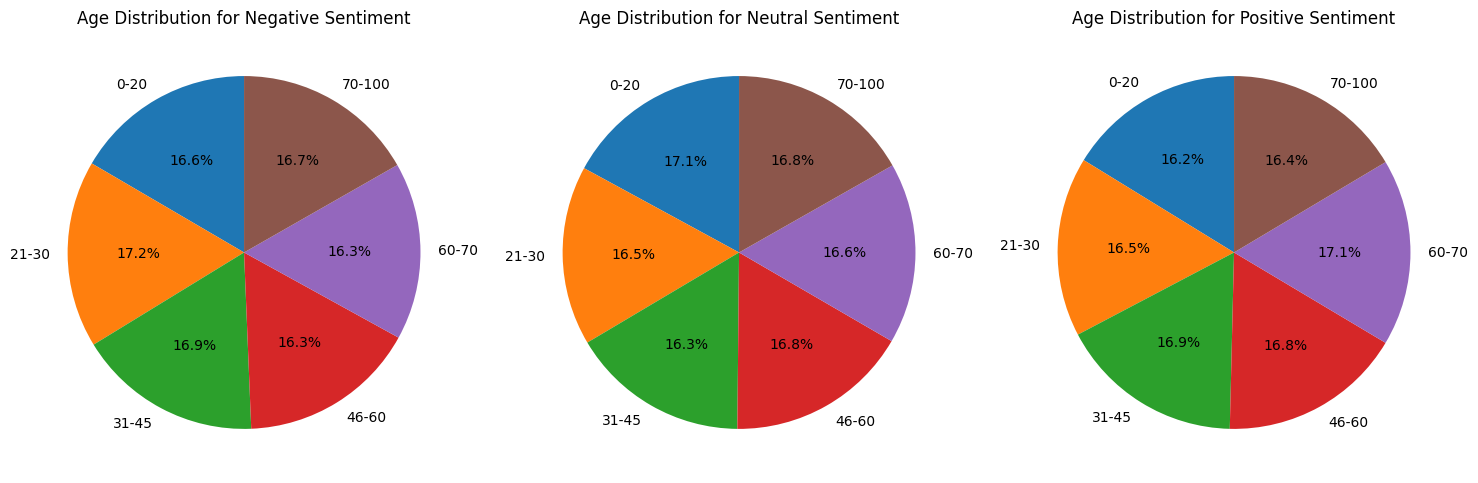

In [21]:
# Group the data by 'sentiment' and 'Age of User', and count the occurrences
sentiment_age_counts = df_train.groupby(['sentiment', 'Age of User']).size().unstack(fill_value=0)

# Plotting pie charts for age distribution for each sentiment
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, sentiment in enumerate(sentiment_age_counts.index):
    counts = sentiment_age_counts.loc[sentiment]
    ax = axes[i]
    ax.pie(counts, labels=sentiment_age_counts.columns, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'Age Distribution for {sentiment.capitalize()} Sentiment')

plt.tight_layout()
plt.show()

Similar to observations in the Time and Sentiment Analysis, compared to the testing dataset, the training dataset has a relatively even age distribution for each sentiment, and a more similar sentiment distribution for each age.